In [138]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calplot

# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [6]:
#Get data
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

#Extract only focus crimes
data_f = data[data['Category'].isin(focuscrimes)]

#Changing Date column to datetime format
data_f['Date']= pd.to_datetime(data_f['Date'])

**Week-day plot:**

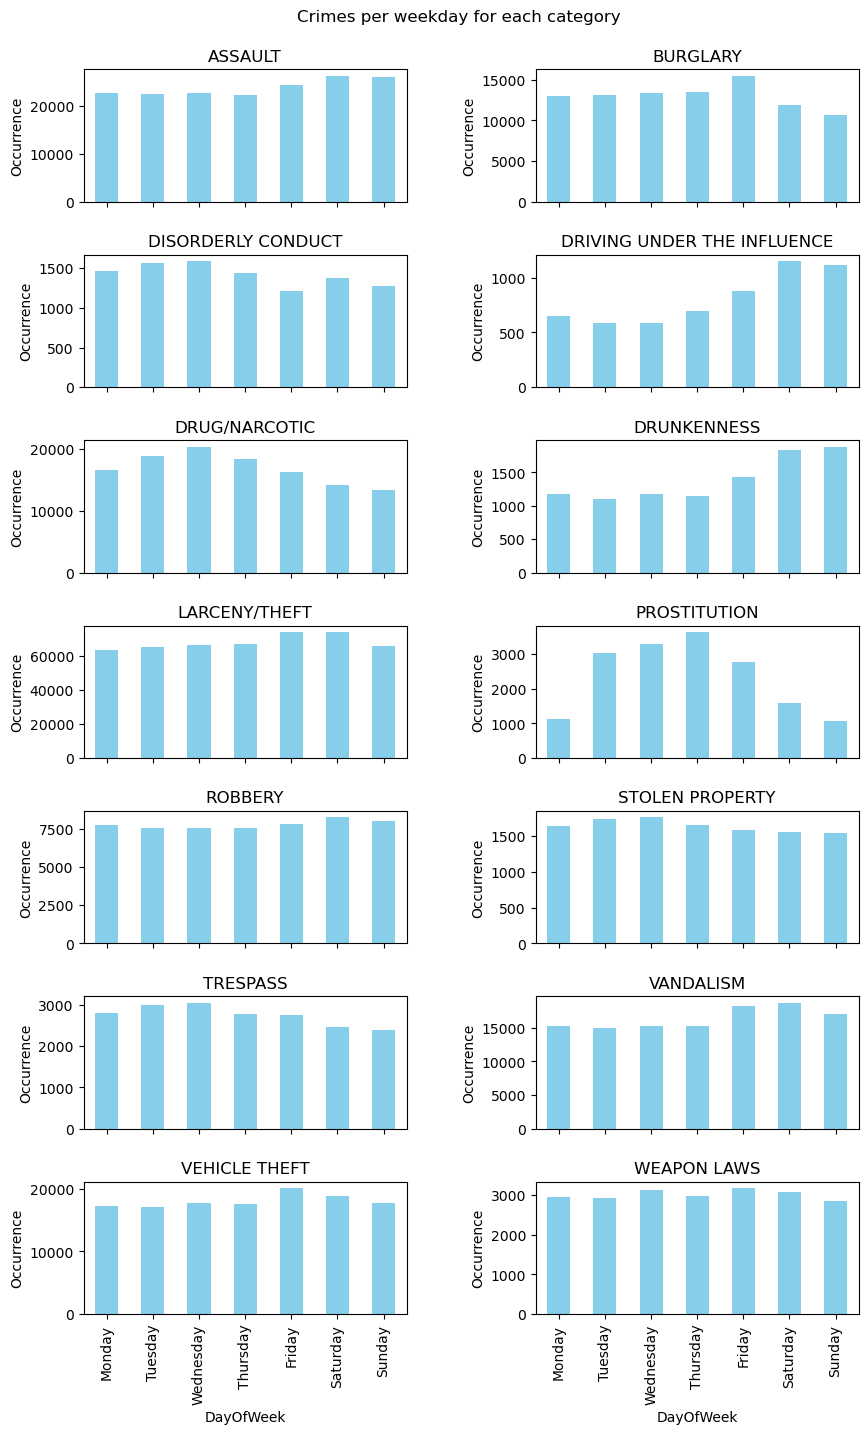

In [179]:
# Week day plot

#Ordered week days
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Create pivot table with ordered week days
d_week=data_f.pivot_table(values='IncidntNum', index='DayOfWeek', columns='Category', aggfunc='count').loc[weekdays]

#Create plot
d_week.plot(kind='bar', subplots=True, grid=False,layout=(7, 2), title="Crimes per weekday for each category", 
          color='skyblue', ylabel='Occurrence',sharex=True, sharey=False,legend=False, figsize=(10,15))
plt.subplots_adjust(top=0.94, wspace=0.4, hspace=0.4)
plt.show()

When investigating the bar plots of the weekly occurrence of crimes per category certain aspects stands out. 

The commission of offenses such as _Assaults_, _Drunkeness_ and _Driving under influence_ are occuring more doing the weekends, which could potentially be attributed to increased alcohol consumption and social gatherings such as parties during the weekend. Furthermore _Burglary_ and _Vehicle teft_ appear to occur most frequently on Fridays.  Whereas _Prostitution_ and _Drug/Narcotic_ tend to be more prevalent during weekdays, which could potentially be explained by individuals resorting to these illicit activities as a means of coping with job-related stress or due to being away from their families during the weekdays.



**Monthly plot:**

/var/folders/yg/w6070vrj7q1382x4m682sftm0000gn/T/ipykernel_71159/551181237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Date']= pd.to_datetime(data_f['Date'])
/var/folders/yg/w6070vrj7q1382x4m682sftm0000gn/T/ipykernel_71159/551181237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Month'] = data_f['Date'].dt.month_name()


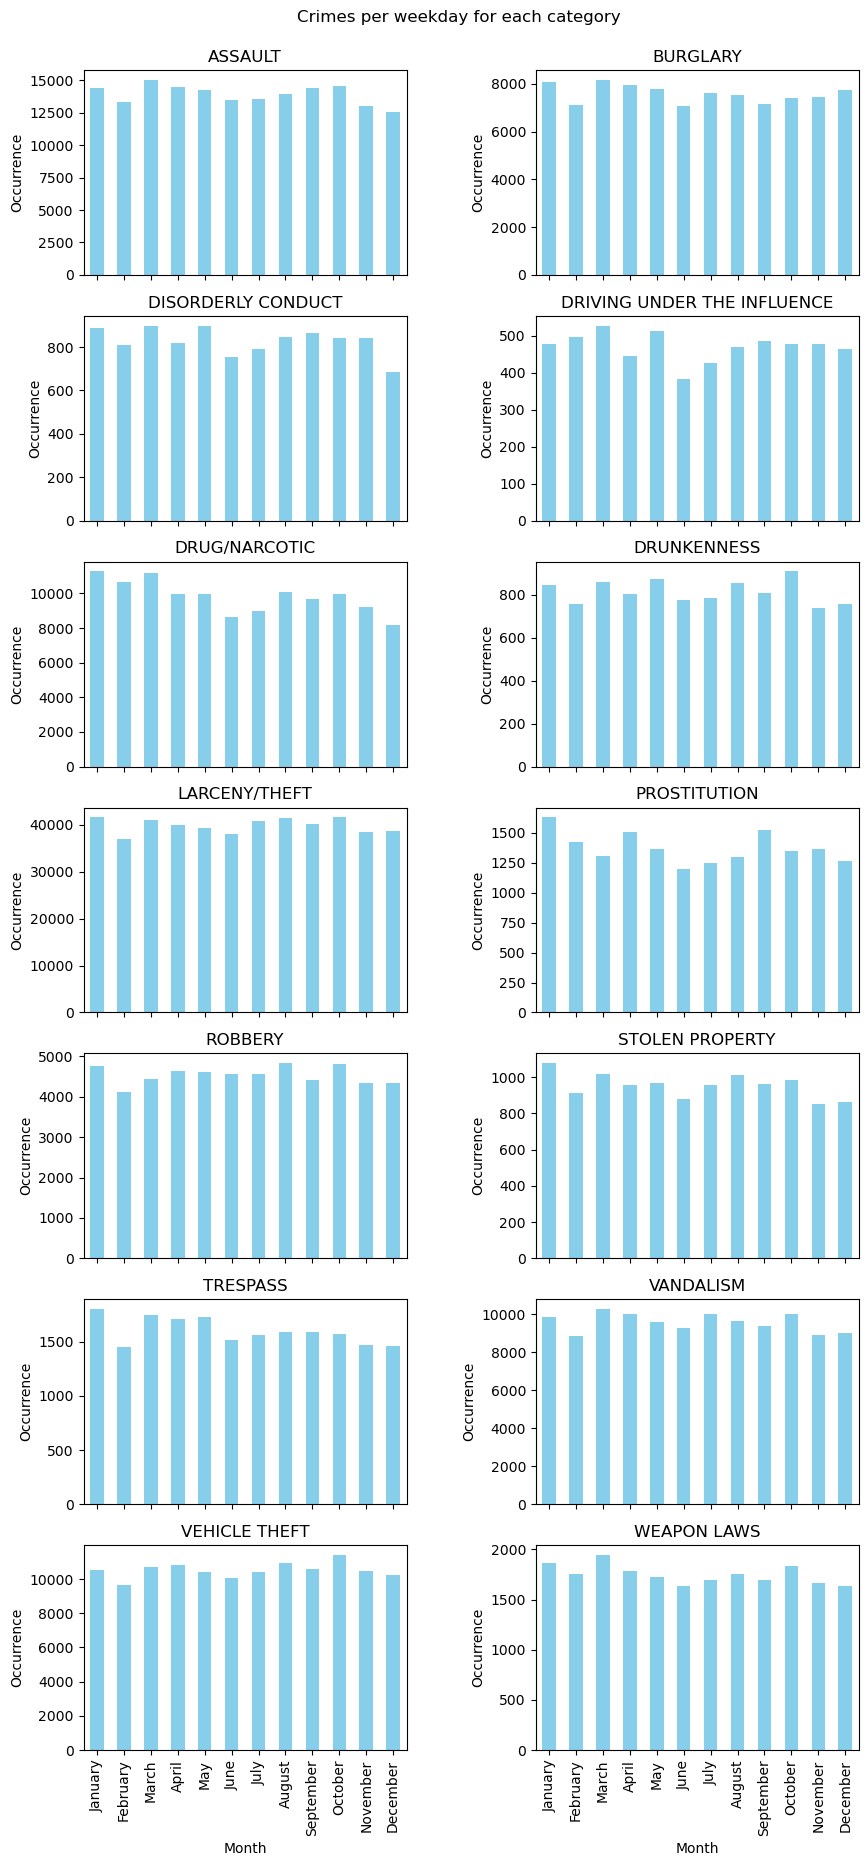

In [78]:
# Month plot

#Extract month from Date column
data_f['Month'] = data_f['Date'].dt.month_name()

#Name of months
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October', 'November','December']

#Create pivot table with months as index
d_month=data_f.pivot_table(values='IncidntNum', index='Month', columns='Category', aggfunc='count').loc[months]

#Create plot
d_month.plot(kind='bar', subplots=True, grid=False,layout=(7, 2), title="Crimes per month for each category", 
          color='skyblue', ylabel='Occurrence',sharex=True, sharey=False,legend=False, figsize=(10,20))
plt.subplots_adjust(top=0.95, wspace=0.4)
plt.show()

When analysing the plot of the monthly occurrance of crimes, it is first of all noticeable that February exhibits the lowest frequency of crimes overall. This observation is anticipated given the shorter duration of February in comparison to other months. To perform an adequate comparison between the months, a plausible methodology could involve the calculation of the crime-per-day ratio for each month, thereby enabling the comparison of the crime rates across months with varying numbers of days. That said we will still try to compare the monthly occurrence for each crime type based on the above plots. It can be stated that, most crime category has less occurrence doing June, expecially _Driving under the influence_ happens less in June. Furthermore _Disordarly conduct_ and _Drug/narcotic_ is happening less in December, maybe due to Cristmas time. Other than that on an overall note, the majority of crime categories appear to exhibit a relatively uniform distribution throughout the year.

**24 hour cycle plot:**

/var/folders/yg/w6070vrj7q1382x4m682sftm0000gn/T/ipykernel_71159/4134115234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Hour'] = pd.to_datetime(data_f['Time']).dt.hour


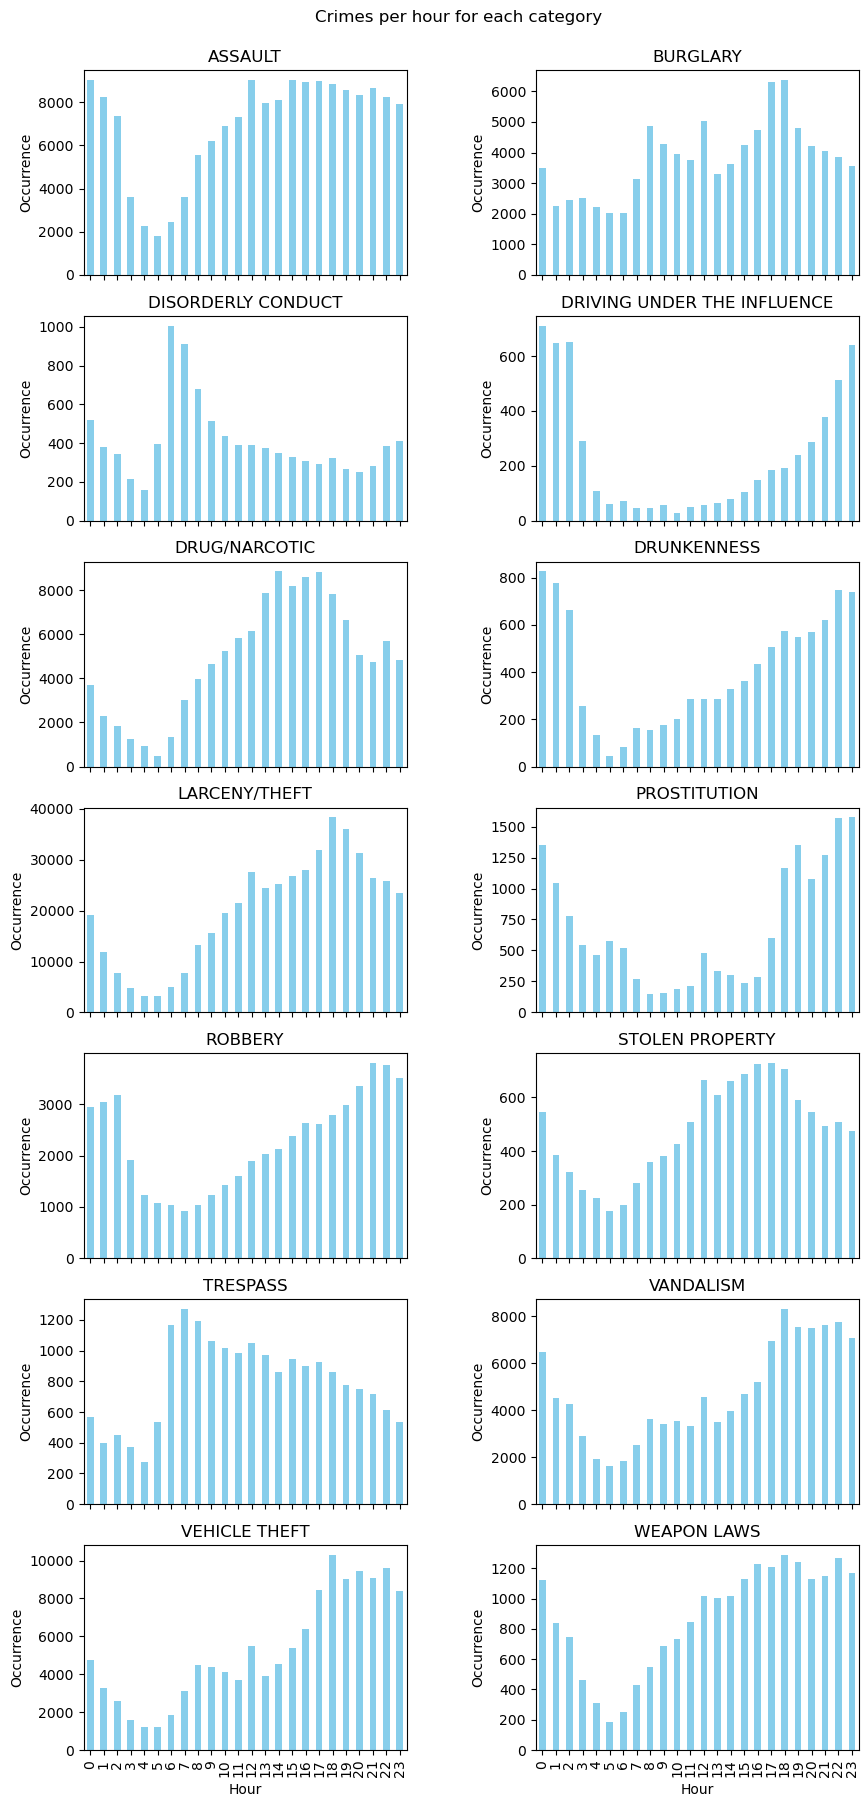

In [90]:
# 24 hour cycle plot

#Extract hours from Date column
data_f['Hour'] = pd.to_datetime(data_f['Time']).dt.hour


#Create pivot table with hours as index
d_hour=data_f.pivot_table(values='IncidntNum', index='Hour', columns='Category', aggfunc='count')

#Create plot
d_hour.plot(kind='bar', subplots=True, grid=False,layout=(7, 2), title="Crimes per hour for each category", 
          color='skyblue', ylabel='Occurrence',sharex=True, sharey=False,legend=False, figsize=(10,20))
plt.subplots_adjust(top=0.95, wspace=0.4)
plt.show()

When looking at the bar plot of the 24 hour cycle over crimes occurrence it is noticeable that the timing of crimes varies considerably across the day for all crimes. Some crime categories happens mostly in peaks and some categories happens more evenly distributed doing the day. The majority of crime categories exhibit their lowest frequency of incidents around 4 AM, except _Prostitution_ and _Driving under influence_ which both has thir lowest frequency of incidents around 8 AM to 10 AM, presumably due to the reduced likelihood of alcohol consumption during these hours.

Additionally, a positive correlation can be observed between the peaks of _Drunkenness_ and _Driving under the influence_, which is to be expected given the inherent association between the two.


**168 hour cycle plot:**

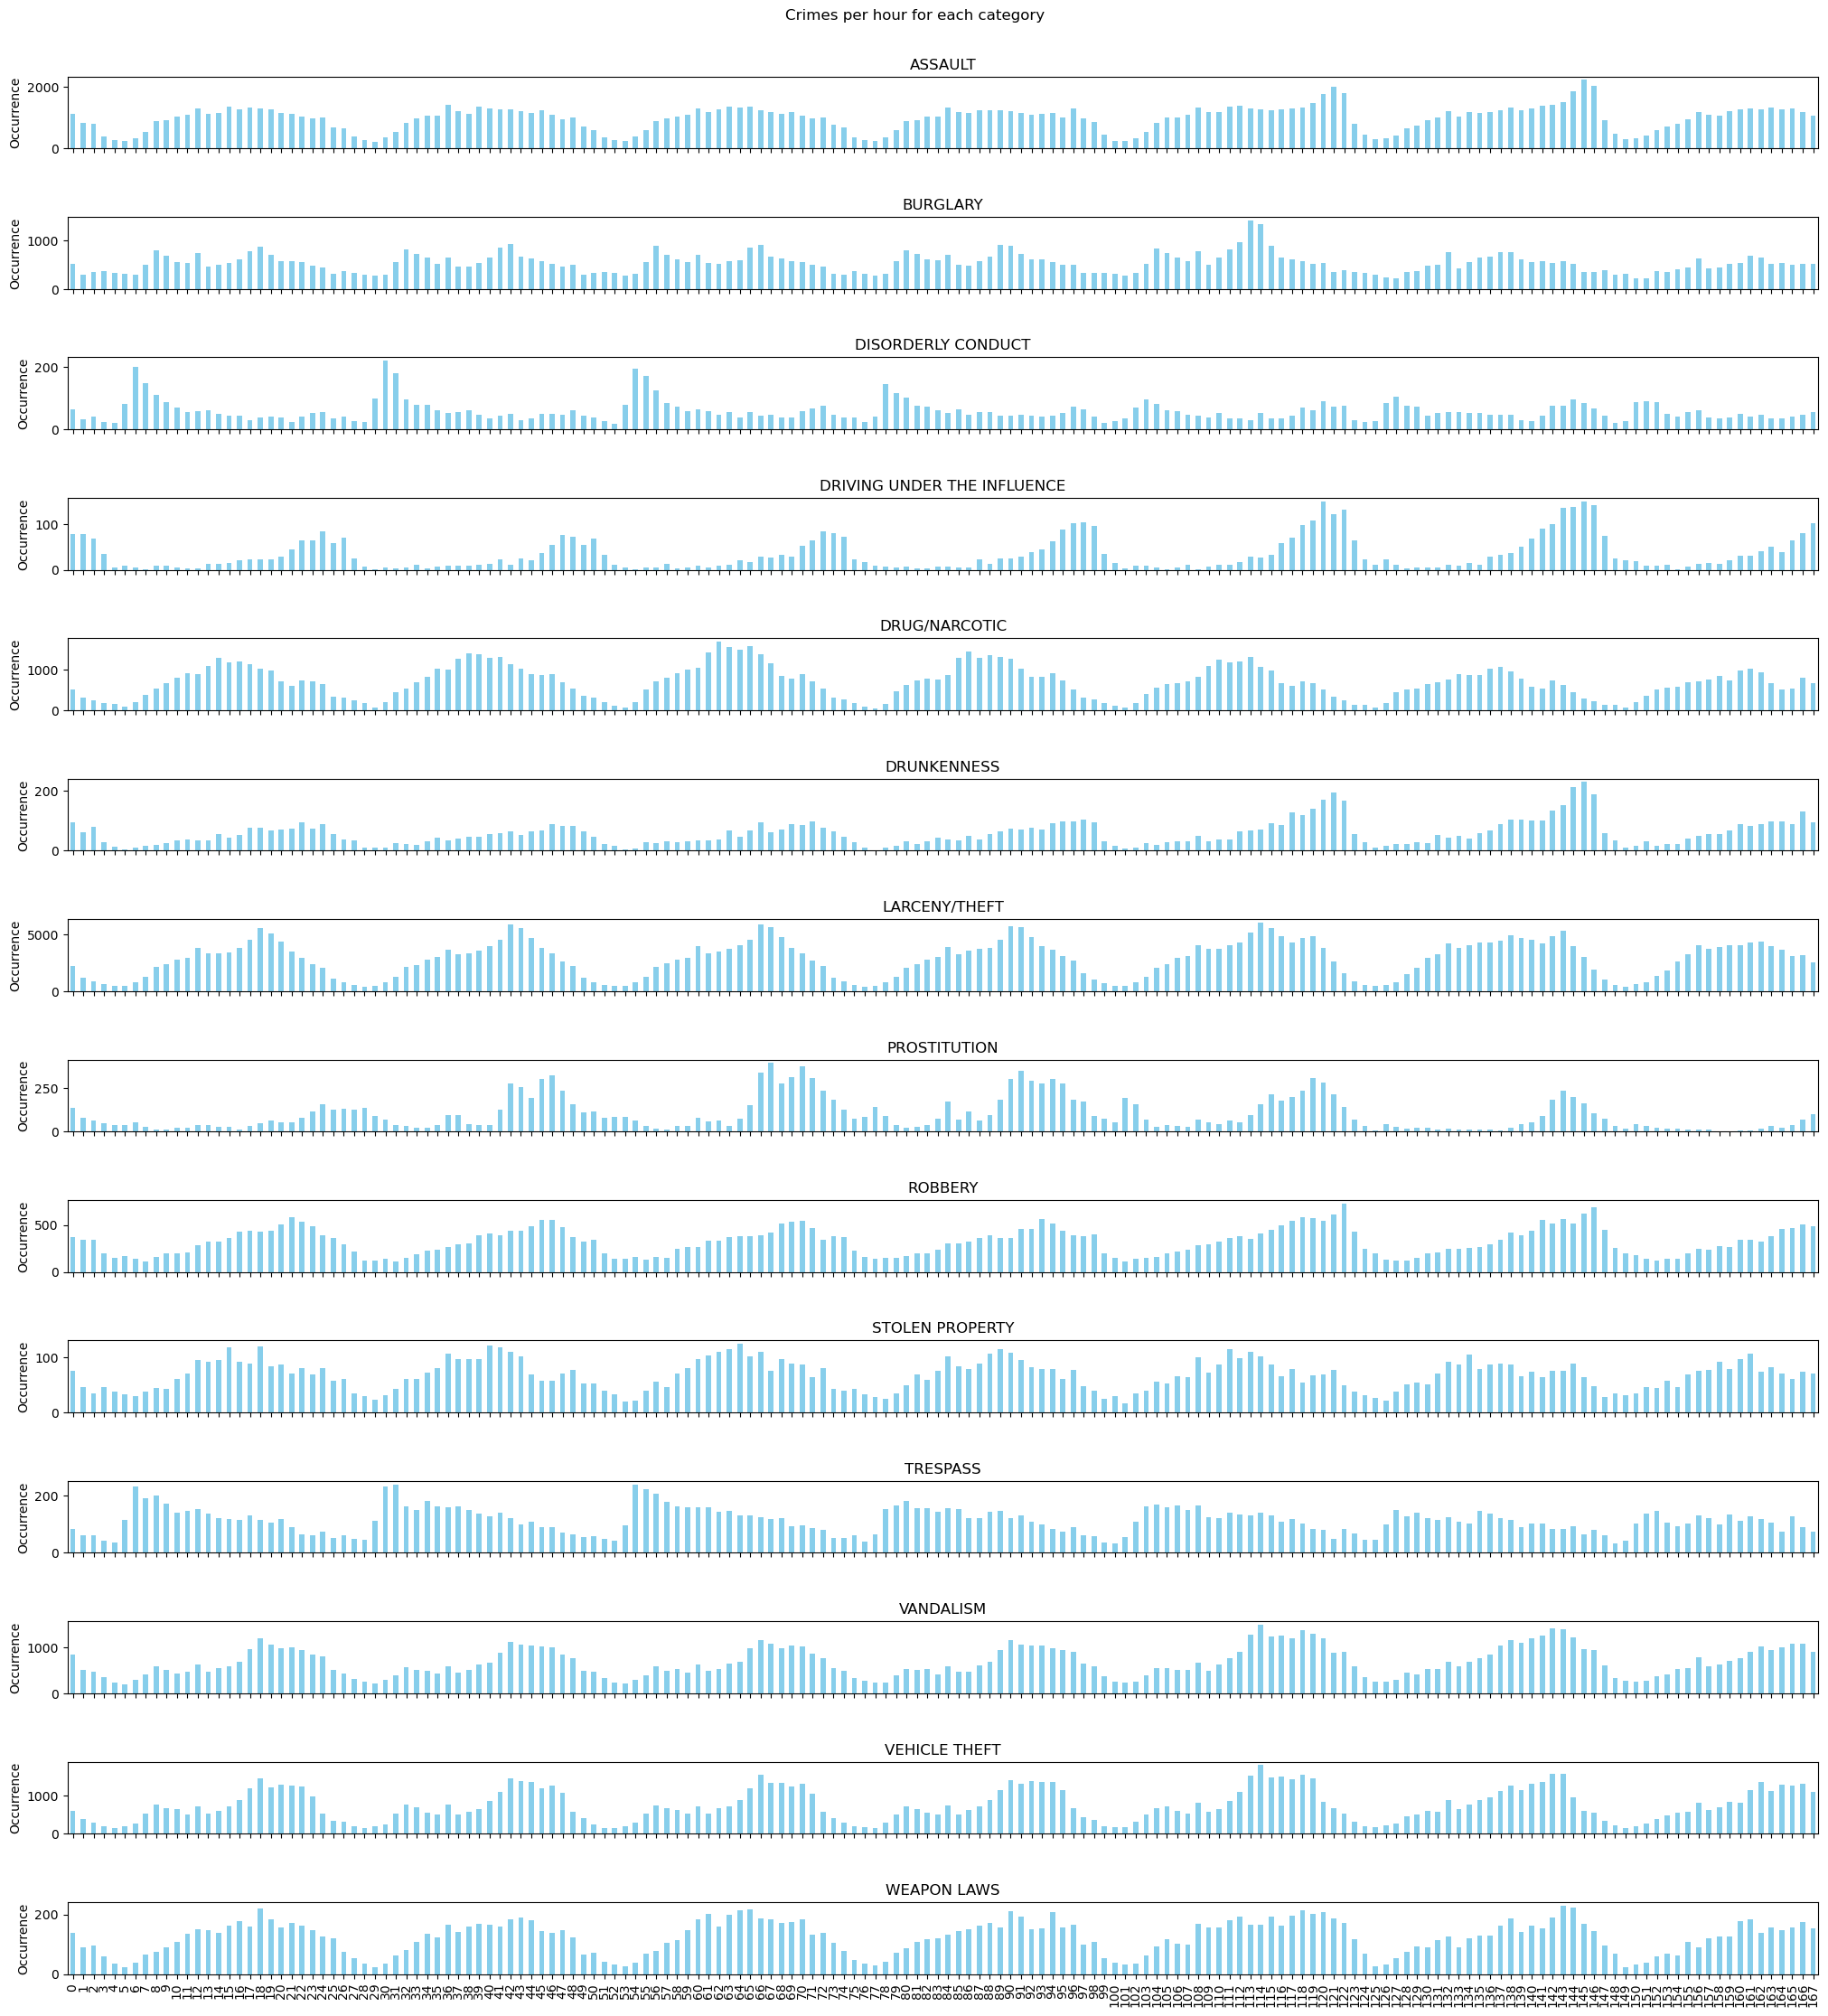

In [121]:
# 168 hour cycle plot

#Create pivot table with weekdays and hours as index
d_week_hour = data_f.pivot_table(values='IncidntNum', index=['DayOfWeek','Hour'], columns='Category', aggfunc='count').loc[weekdays]

d_week_hour = d_week_hour.reset_index().drop(['Hour','DayOfWeek'], axis=1)



#Create plot
d_week_hour.plot(kind='bar', subplots=True, grid=False,layout=(14, 1), title="Crimes per hour for each category", 
          color='skyblue', ylabel='Occurrence',sharex=True, sharey=False,legend=False, figsize=(25,25))
plt.subplots_adjust(top=0.95, hspace=0.95)
plt.show()

The 168 hour cycle plot provides a more detailed picture of the distribution of crimes for each category. Some crime categories such as _Stolen Property_ has the same hourly distribution regardless of the day of the week, whereas other categories such as _Prostitution_ has different hourly distribution depending on the day of the week. Doing the weekdays prositution also happens doing the mid day hours, where Saturday and Sunday almost only has prostitution doing the nightly hours. This could be explained by people being with their families and kids doing weekends. For _Threspass_ the incidents is mostly in peaks doing the weekdays and more flat distributed doing the weekends. 

**Choose a crime type and create calender plot: Weapon Laws**

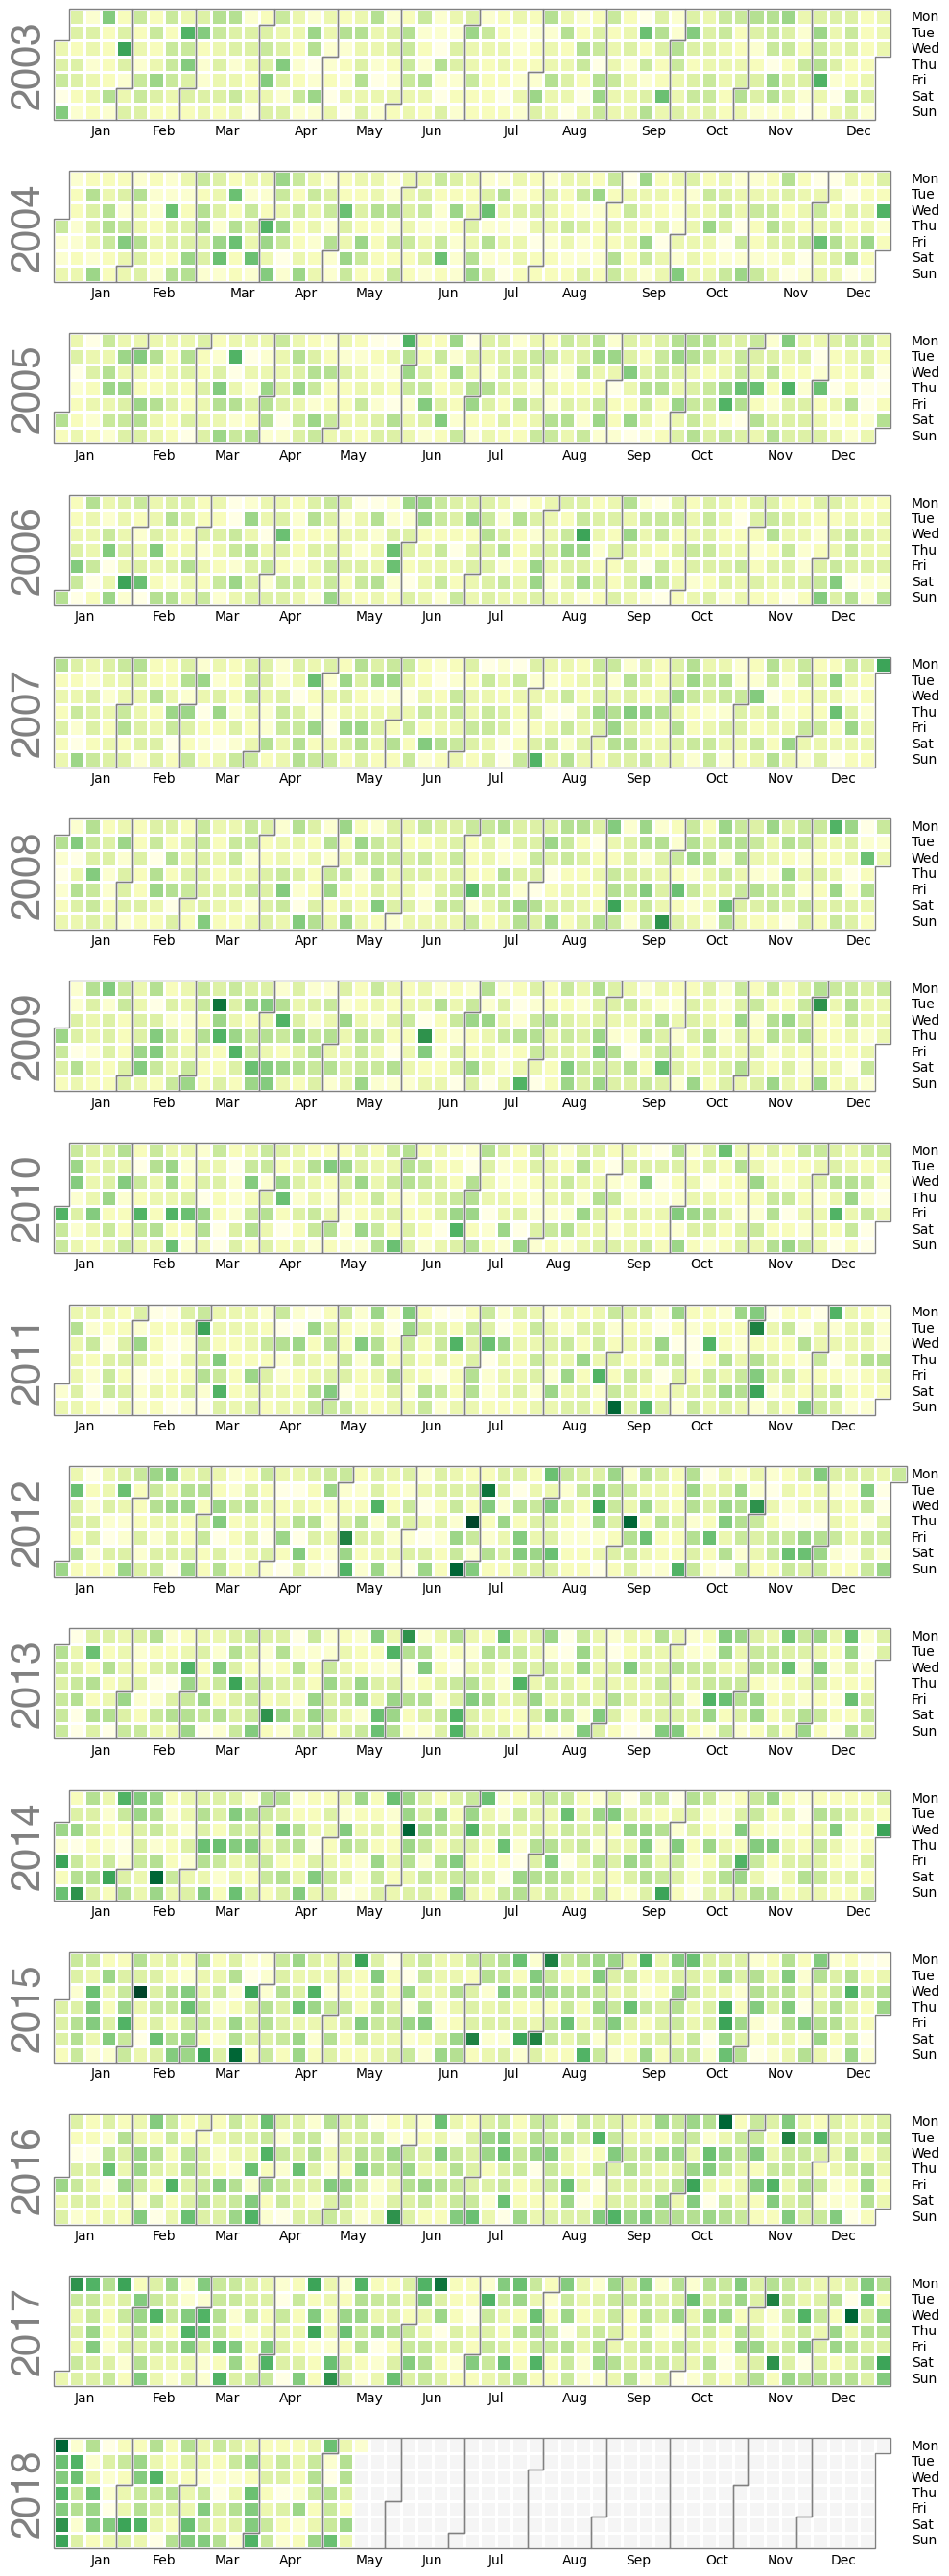

In [183]:
#Weapon laws data
weapon = data_f[data_f['Category']=='WEAPON LAWS']

#Create input to calender plot
events = weapon.pivot_table(values='IncidntNum', index=['Date'], aggfunc='count').squeeze()

#Calender plot
calplot.calplot(events, cmap='YlGn', colorbar=False)
plt.show()

The calender plot of weapon laws shows that the number of incidents has increase doing the years and that there is specific peaks doing some times. This could be do to events happening in an areas that causes incease in weapon laws crimes. Further investigation could be done to see what causes peaks some days compared to others, hopefully such analysis can in the future help the police understand crimes habits better. (Further data would be needed to investigate events that day). 

**Choose a different crime type and create a polar plot: Assaults**

In [165]:
#Assults data
assaults = data_f[data_f['Category']=='ASSAULT']

#Create 24 hour data
event = assaults.pivot_table(values='IncidntNum', index=['Hour'], aggfunc='count')

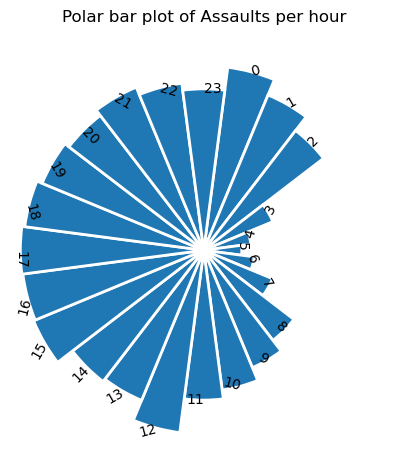

In [166]:
#Plot

# set figure size
plt.figure(figsize=(5,7))

# plot polar axis
ax = plt.subplot(111, polar=True)
#set direction
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max in the dataset
max = event['IncidntNum'].max()

# heights of bars
slope = (max - lowerLimit) / max
heights = slope * event.IncidntNum + lowerLimit

# Compute the width of each bar
width = 2*np.pi / len(event.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(event.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, event.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

plt.title('Polar bar plot of Assaults per hour')
plt.show()

#Plot code from: https://www.python-graph-gallery.com/circular-barplot-basic

From the polar plot of assaults doing the day, it is easy to see that there in general are fewer assaults in the night/morning hours between 3AM and 8AM, but due to the structure of a polar plot it is more difficult to compare bars on oppesite site of the circle. It is difficult to tell if there are most incidents doing hour 0 or hour 12 (12 PM or 12 AM). 

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* Explain in your own words: What is the problem with pie-charts?

> * Mention 10 examples of ways we can encode data.

**Answer**:  
- Position
- Length
- Area
- Shape
- Angle
- Color
- Nodes
- Links
- Line weight
- Texture


> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

**Answer**: \
All encodings are not created equally. Good encodings take the data and encode it in a way that helps our brain understand it. Poorly encoded data obscures the patterns that our visual system would otherwise be able to pick out when reading the visualization.

In terms of an example from the previous lectures, it was eye-opening to use calender plots for week 2's temporal data. Ditching the bar charts and encoding the data in a format more tightly connected with time and dates allowed obscured patterns to emerge and highlight themselves.

> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

**Answer**:  
- Angle
- Area/size
- Color intensity

In regards of a visualization online that encode data in a difficult-to-parse format, the following monstrosity highlights an extreme example:  
  
Although constructed as a parody, it nevertheless carries seven information-packed variables:  
– Three conveyed by position along the x-axis, y-axis and z-axis.  
– Another two by the columns’ length and width.  
– One by the size of the stacks within the column.  
– One by the pie chart atop the columns.  
  
Despite clear guidelines for how the encoding works, the plot is completely unparsable by any human and is therefore awful as a tool for encoding data.

[![Honorable mention](https://i.redd.it/vjkm9vpn8n011.png)](https://i.redd.it/vjkm9vpn8n011.png)

*Source: 3D Stacked Scatter Pie Columns., http://eagerpies.com/better-than-minard/*

> * Explain in your own words: What is the problem with pie-charts?

**Answer**:  
Pie charts are problematic because our brain is bad at estimating the exact size of areas and angles. This makes comparison between two data points difficult, which is a deal-braker for Data Scientists. Bar charts avoid this issue by encoding the data in lengths and positions, which is easier for the brain to handle.
  
If the pie chart ultimately fails at making the data easier for our visual system to decode and quantify, it defeats the entire purpose of visualizing data in the first place! 

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.